In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, accuracy_score, recall_score, f1_score
import joblib
from sklearn.neighbors import KNeighborsClassifier



In [68]:
df = pd.read_csv('../../data/GTZAN_Dataset/features_3_sec.csv')
df = df.drop('filename',axis =1)
df['label'].value_counts()

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

In [44]:
y = df['label']
X = df.drop(['label','length', 'zero_crossing_rate_var', 'tempo', 'mfcc2_var', 'mfcc9_var',
        'mfcc10_var', 'mfcc11_var', 'mfcc12_var', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var','perceptr_mean', 'perceptr_var'],axis=1)



In [71]:
len(X.columns)

35

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
cols = X.columns
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
joblib.dump(min_max_scaler, 'scaler.joblib')

['scaler.joblib']

In [47]:
X.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc15_mean', 'mfcc17_mean'],
      dtype='object')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [8]:
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred,average='macro')
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred,average='macro')
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score: %f' % f1)

Accuracy Score: 0.811049
Precision Score: 0.813012
Recall Score: 0.810667
F1 Score: 0.809785


In [49]:
model = RandomForestClassifier(n_estimators=1000, max_depth=35,criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=35, n_estimators=1000)

In [42]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred,average='macro')
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred,average='macro')
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score: %f' % f1)

Accuracy Score: 0.878303
Precision Score: 0.878286
Recall Score: 0.878191
F1 Score: 0.877651


In [ ]:
joblib.dump(model, 'genre_model.joblib')

In [56]:
knn_param_grid={
    'n_neighbors':np.linspace(1,20,10,dtype=int).tolist(),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

In [73]:
knn_grid_search = GridSearchCV( KNeighborsClassifier(),param_grid=knn_param_grid)
knn_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'weights': ['uniform', 'distance']})

In [74]:
model2 = knn_grid_search.best_estimator_
y_pred = model2.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred,average='macro')
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred,average='macro')
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score: %f' % f1)

Accuracy Score: 0.928343
Precision Score: 0.928076
Recall Score: 0.927811
F1 Score: 0.927668


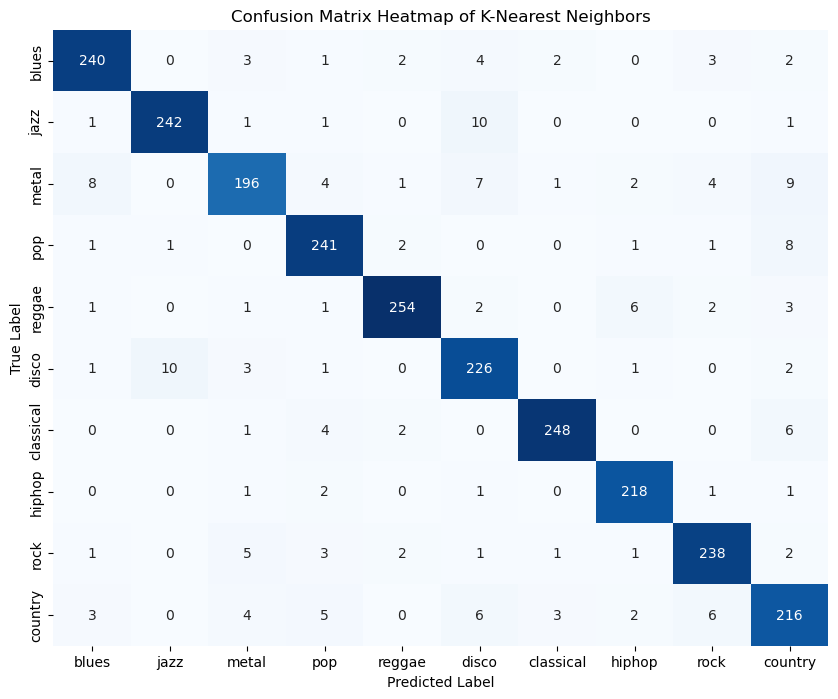

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['blues',       
'jazz',         
'metal',        
'pop',          
'reggae',       
'disco',         
'classical',     
'hiphop',        
'rock',          
'country',       ], yticklabels=['blues',       
'jazz',         
'metal',        
'pop',          
'reggae',       
'disco',         
'classical',     
'hiphop',        
'rock',          
'country',       ])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap of K-Nearest Neighbors")
plt.show()

In [77]:
joblib.dump(model2,'knn_model.joblib')

['knn_model.joblib']